https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest,zconfint
from statsmodels.stats.proportion import proportions_ztest

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import matplotlib.pyplot as plt




In [2]:
df=pd.read_csv('data/house_prices.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
H0=df['SalePrice'].mean()
H0

180921.19589041095

In [4]:
#¿Es el precio medio de venta de una casa en la zona estudiada mayor de 180K€?
ztest(df['SalePrice'], value=180000,alternative='larger')


(0.44307321990459303, 0.3288563873974769)

Como el valor pi es mayor que alfa (sea 0'001, 0'05 o 0'1), no rechazamos la hipotesis nula.Y por lo tanto, la media de precio de pisos es de 180K €.

In [5]:
zconfint(df['SalePrice'],alpha=0.0005)

(173684.33671870158, 188158.05506212031)

Como 180.000 está dentro del rango, no podemos recahzar la hipotesis nula. Por lo tanto, no podemos confirmar que la media sea mayor a 180K.

In [6]:
#El 10% de las casas vendidas son nuevas
count=len(df[(df['SaleType']=='New')])
obs=len(df['SaleType'])
significance = 0.05
null_hypothesis = 0.1

proportions_ztest(count=count, nobs=obs, value=null_hypothesis)

#Como pi value> significance, no podemos rechazar la hipotesis nula. Por lo tanto, no podemos rechazar que el 10% de las ventas sean casas nuevas.


(-2.269758742455338, 0.023222225093285084)

In [8]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [12]:
model=ols('SalePrice ~ MSZoning',data=df).fit()
anova_table=sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
MSZoning,9.904000e+11,4.0,43.840282,8.817634e-35
Residual,8.217511e+12,1455.0,NaN,NaN


In [27]:
tukey=pairwise_tukeyhsd(endog=df['SalePrice'],groups=df['MSZoning'],alpha=0.4)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.40       
 group1 group2   meandiff  p-adj     lower        upper    reject
-----------------------------------------------------------------
C (all)     FV 139486.0615    0.0   94660.1161 184312.0069   True
C (all)     RH   57030.375 0.3272    3833.9818 110226.7682   True
C (all)     RL 116476.9948    0.0   74565.4226  158388.567   True
C (all)     RM  51788.8303 0.2075    9111.7518  94465.9087   True
     FV     RH -82455.6865 0.0008 -119283.9587 -45627.4143   True
     FV     RL -23009.0668 0.1154  -39833.0161  -6185.1174   True
     FV     RM -87697.2313   -0.0 -106346.5855 -69047.8771   True
     RH     RL  59446.6198 0.0147   26227.1054  92666.1342   True
     RH     RM  -5241.5447 0.9988  -39421.7916  28938.7021  False
     RL     RM -64688.1645   -0.0  -74435.6213 -54940.7077   True
-----------------------------------------------------------------


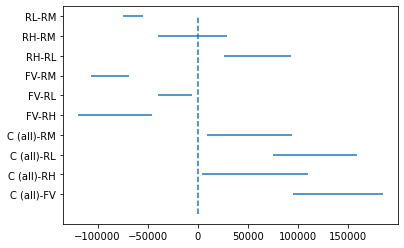

In [28]:
rows = tukey.summary().data[1:]
plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
plt.gca().set_yticks( range( len( rows ) ) )
plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
plt.show()

Con un 60% de confianza (alpha=4) podemos afirmar que el mayor precio de todos está en la Zona C